In [2]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree

import numpy as np

C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

Принимаем данные

In [4]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [5]:
df = pd.read_csv('C:/Users/Anton/Documents/4_курс/ВКР/Данные.csv', sep=';', engine='python')
df['nameOrig'] = df['nameOrig'].map(lambda x: x.lstrip('CM'))
df['nameDest'] = df['nameDest'].map(lambda x: x.lstrip('CM'))

X = df.drop(['isFraud','isFlaggedFraud'], axis=1)
y = df['isFraud']

# Делим выборку на train и test, все метрики будем оценивать на тестовом датасете

train_data, test_data, train_label, test_label = cross_validation.train_test_split(X, y, test_size = 0.3, random_state=42)


In [8]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [9]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_label, predictions)

0.9995549522686308

##### Разделяющая поверхность

In [10]:
def get_meshgrid(x, y, step=.05, border=.5,):
    x_min, x_max = x.min() - border, data[:,0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np_arange(y_min, y_max, step))

In [14]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, colors = colors, light_colors = light_colors):
    estimator.fit(train_data, train_labels)
    pyplot.figure(figsize = (16, 6))
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data accuracy=[:.2f]'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:,0], test_data[:,1], c = test_labels, s = 100, cmap= colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

TypeError: unhashable type: 'slice'

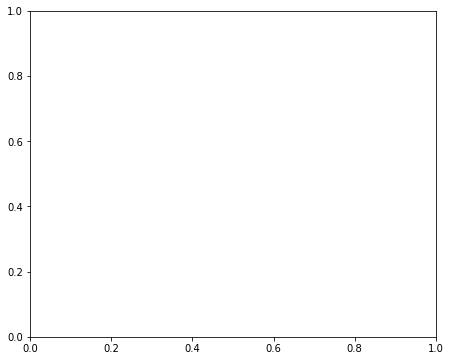

In [16]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, train_data, train_label, test_data, test_label)